Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ls...)`


Epoch 1/1
2/2 [==============================] - 2s 1s/step - loss: 26967.8223


In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [5]:
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Colab Notebooks"

mkdir: cannot create directory ‘drive’: File exists
DataDistribution.xlsx  SyntheticData2.csv  Untitled0.ipynb
my_model.h5	       SyntheticData.csv   Zomato_LSTM.ipynb


In [3]:
!pip install xlrd

In [0]:
import xlrd 
import numpy as np
  
# Give the location of the file 
loc = ("drive/Colab Notebooks/DataDistribution.xlsx" )
  
# To open Workbook 
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0)
text_file = open("drive/Colab Notebooks/SyntheticData2.csv", "w")


for k in range(4):
  for j in range(2):
    for i in range(1,sheet.nrows): 
        u = sheet.cell_value(i, 3)
        r = np.random.randint(-5, 5, size=10)
        u = r + u
        u = u.clip(min=1)
        s = u * 0.2
        L =np.random.normal(u,s,10)
        res = ",".join(map(str,L))
        text_file.write(res + '\n')

  for j in range(5):
    for i in range(1,sheet.nrows): 
        u = sheet.cell_value(i, 4) 
        r = np.random.randint(-5, 5, size=10)
        u = r + u
        u = u.clip(min=1)
        s = u * 0.2
        L =np.random.normal(u,s,10)
        res = ",".join(map(str,L))
        text_file.write(res + '\n')
      
text_file.close()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas
import math

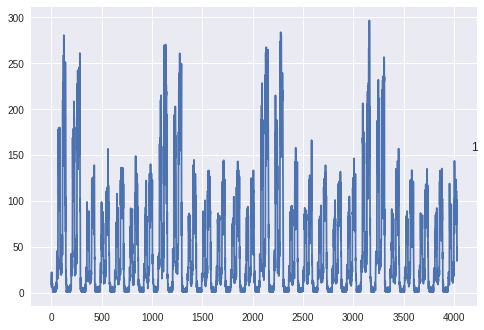

In [20]:
dataset = pandas.read_csv('drive/Colab Notebooks/SyntheticData2.csv', engine='python',  header=None)
values = dataset.values
values = values.astype('float32')
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
groups = [1]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [0]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(dataset[i + look_back, :])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainX, trainY = create_dataset(dataset, look_back)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adadelta


model = Sequential()
model.add(LSTM(10, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(10))
model.compile(loss='mae', optimizer='adam')
model.summary
model.fit(trainX, trainY,epochs=100, batch_size=20, verbose=2)

Epoch 1/100
 - 2s - loss: 47.8668
Epoch 2/100
 - 1s - loss: 46.4141
Epoch 3/100
 - 1s - loss: 45.2933
Epoch 4/100
 - 1s - loss: 44.3250
Epoch 5/100


KeyboardInterrupt: ignored

In [0]:
model.save('drive/Colab Notebooks/my_model.h5')
print("Saved model to disk")

In [0]:
from keras.models import load_model
model = load_model('drive/Colab Notebooks/my_model.h5')

In [0]:
def predict(t):
  testPredict = model.predict(t[np.newaxis, np.newaxis, :])
  return testPredict

In [9]:
import numpy as np
print(predict(np.array([2,10,10,5,200,40,14,10,6,32])))

[[11.167195 11.32677  11.413637 11.241588 11.050077 10.945148 11.197804
  11.438335 11.141109 11.270088]]


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 20)                2480      
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
